<h2> AUTHORS: Albin Larsson & Alex Wolf

<h3>Task 1: Working with a dataset with categorical features</h3>
<h4>Step 1. Reading the data</h4>

In [1]:
import pandas as pd
import numpy as np

adult_test = pd.read_csv('adult_test.csv')
adult_train = pd.read_csv('adult_train.csv')

In [2]:
#checking out data
adult_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [3]:
# splitting labels and data training and test set
Y_train = adult_train['target']
X_train = adult_train.drop('target', axis=1)
Y_test = adult_test['target']
X_test = adult_test.drop('target', axis=1)

<h4>Step 2: Encoding the features as numbers.</h4>
DictVectorizer needs data as a dictionary and not dataframe therefore convert dataframe to dict

In [4]:
X_train_dict = X_train.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

In [5]:
from sklearn.feature_extraction import DictVectorizer

# Initialize and transform data
vec = DictVectorizer()
X_train_dv = vec.fit_transform(X_train_dict)
X_test_dv = vec.transform(X_test_dict)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# initialize and check out cross validation score
# depth of 6 is arbitrary; just to check if it works
dtc = DecisionTreeClassifier(random_state=0, max_depth=6)

np.average(cross_val_score(dtc, X_train_dv, Y_train))

0.8543964188425266

<h4>Step 3. Combining the steps.</h4>

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# create pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier(random_state=0, max_depth=6)
)

# fit data and predict 
pipeline.fit(X_train_dict, Y_train)
y_predict = pipeline.predict(X_test_dict)

accuracy = accuracy_score(Y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8575026104047663


<h3>Task 2: Decision trees and random forests</h3>

<h4>Underfitting and overfitting in decision tree classifiers.</h4>

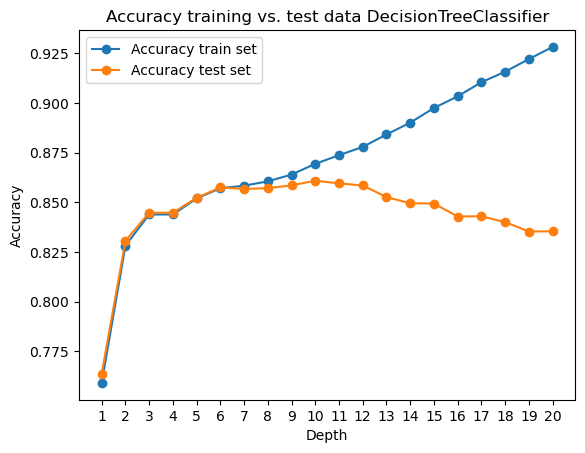

In [8]:
# DecisionTreeClassifier

import matplotlib.pyplot as plt

acc_train = []
acc_test = []
depth = []


for i in range(1,21):
    # create pipeline
    pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(random_state=0, max_depth=i)
    )
    
    # fitting data and predicting train and test data
    pipeline.fit(X_train_dict, Y_train)
    y_predict_train = pipeline.predict(X_train_dict)
    y_predict_test = pipeline.predict(X_test_dict)

    acc_train.append(accuracy_score(Y_train, y_predict_train))
    acc_test.append(accuracy_score(Y_test, y_predict_test))
    depth.append(i)

# Plot the results
plt.plot(depth, acc_train, label='Accuracy train set', marker='o')
plt.plot(depth, acc_test, label='Accuracy test set', marker='o')
plt.title('Accuracy training vs. test data DecisionTreeClassifier')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depth)  
plt.legend()
plt.show()

In this plot is the same effect as in assignment 1 task 4 step 4 where we used the mean squared error. The training and test set have the same accuracy until one point where the algorithm starts to overfit. This happens after a depth of 6.

<h4>Underfitting and overfitting in random forest classifiers</h4>

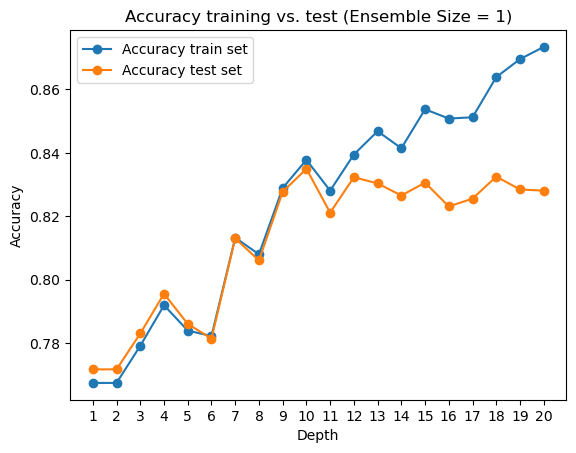

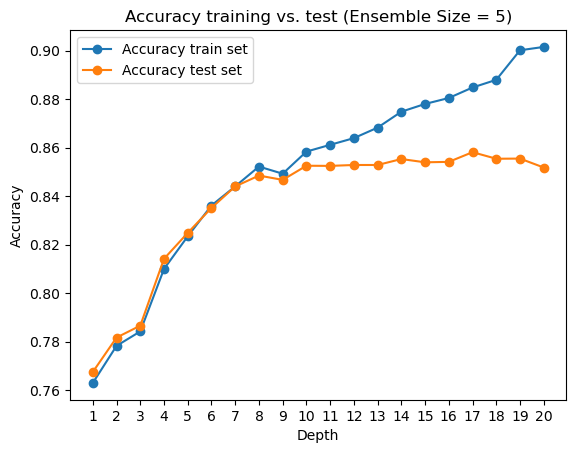

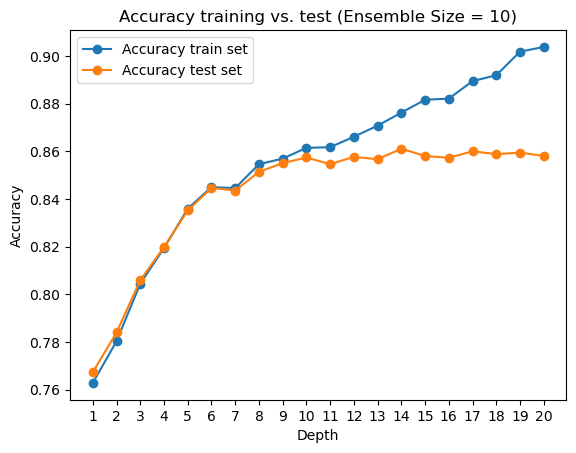

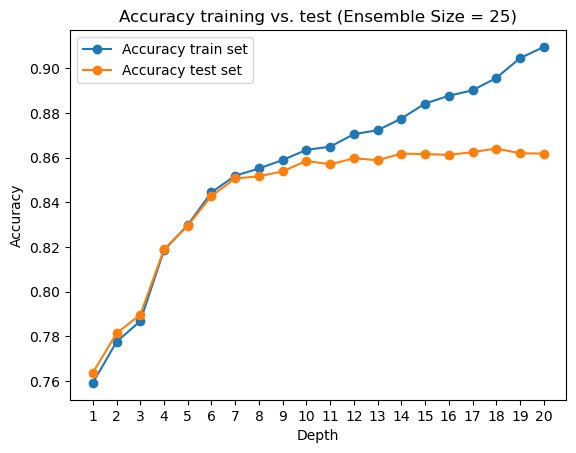

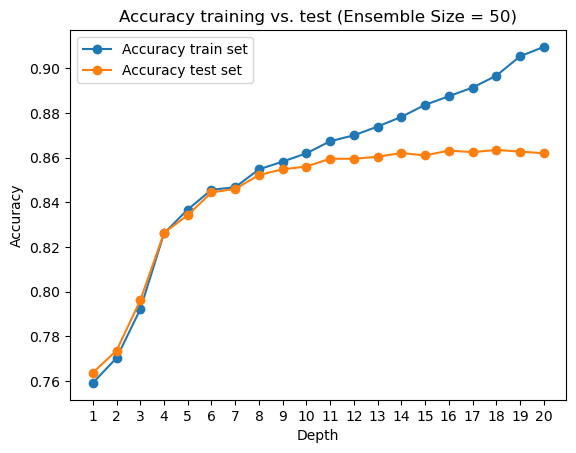

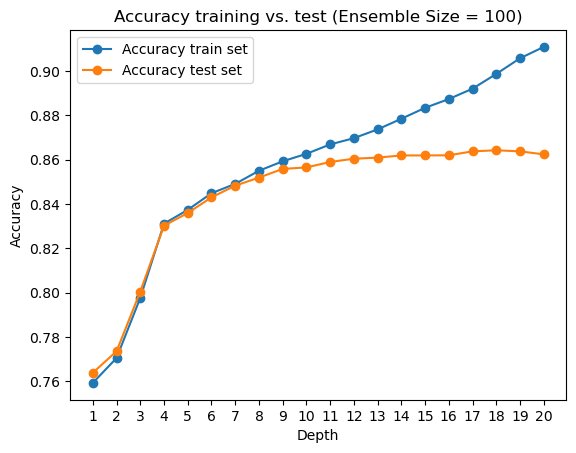

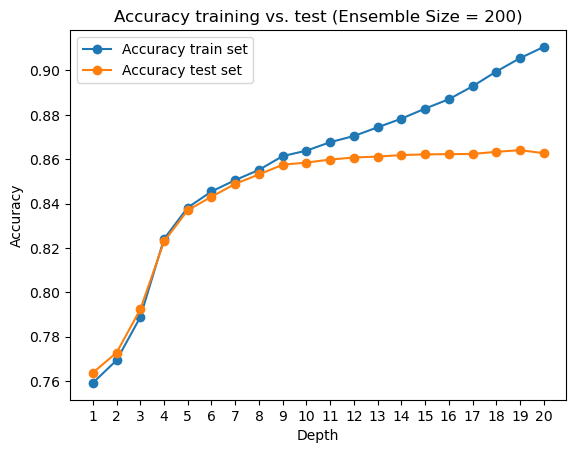

In [9]:
from sklearn.ensemble import RandomForestClassifier
# Define the ensemble sizes
ensemble_sizes = [1, 5, 10, 25, 50, 100, 200]

# Loop over ensemble sizes
for ensemble_size in ensemble_sizes:
    acc_train = []
    acc_test = []
    depth = []

    # Loop over depths from 1 to 20
    for i in range(1, 21):
        # Create pipeline
        pipeline = make_pipeline(
            DictVectorizer(),
            RandomForestClassifier(random_state=0, max_depth=i, n_estimators=ensemble_size, n_jobs=-1)
        )

        # Fitting data and predicting train and test data
        pipeline.fit(X_train_dict, Y_train)
        y_predict_train = pipeline.predict(X_train_dict)
        y_predict_test = pipeline.predict(X_test_dict)

        acc_train.append(accuracy_score(Y_train, y_predict_train))
        acc_test.append(accuracy_score(Y_test, y_predict_test))
        depth.append(i)

    # Plot the results for the current ensemble size
    plt.figure()
    plt.plot(depth, acc_train, label='Accuracy train set', marker='o')
    plt.plot(depth, acc_test, label='Accuracy test set', marker='o')
    plt.title(f'Accuracy training vs. test (Ensemble Size = {ensemble_size})')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.xticks(depth)
    plt.legend()
    plt.show()

What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

-> Because RandomForestClassifier (or RandomForest in general) uses Bootstrapping which means that a subset of the training set is used for training. For each depth a new Bootstrap-sample is used. This is why the Random forest with n_estimators = 1 looks crooked and not so smooth.

What happens with the curve for random forests as the ensemble size grows?

-> It looks more like the decision tree! As we can observe above the training set on different ensemble sizes seems to be about the same. The curve looks more like a decision tree since we average out the bootstrapping effects and the variances in each predictions of the random forest.


What happens with the best observed test set accuracy as the ensemble size grows?

-> When we increase ensemble size the accuracy does not increase on the test set. We are stuck at around 85-86% accuracy at maximum. Then the accuracy tapers of after around 8-10 depth.

What happens with the training time as the ensemble size grows? 

-> It increases a lot. When we first did this codeblock we just tried 1,2 and 3 as ensemble size. When the code worked we did 1 to 200 as ensemble size and the training time increased by a mile.

<h3>Task 3: Feature importances in random forest classifiers</h3>

In [10]:
from sklearn.pipeline import make_pipeline

# create pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier(random_state=0, max_depth=6, n_estimators=100)
)

# fit data and predict 
pipeline.fit(X_train_dict, Y_train)
y_predict = pipeline.predict(X_test_dict)

fn,fi = pipeline.steps[0][1].feature_names_, pipeline.steps[1][1].feature_importances_

In [11]:
score_df = pd.DataFrame({'feautre names': fn, 'feature importance': fi})
score_df = score_df.sort_values(by='feature importance', ascending=False)
score_df.head(10)

,feautre names,feature importance
90,relationship=Husband,0.145626
23,marital-status=Married-civ-spouse,0.145469
1,capital-gain,0.130702
3,education-num,0.114497
25,marital-status=Never-married,0.076151
0,age,0.043343
20,hours-per-week,0.035507
74,occupation=Exec-managerial,0.029894
93,relationship=Own-child,0.029770
2,capital-loss,0.029236


I can not make a lot of sense why married people are more likely to earn more than 50k$. My best guess would be that they are already older and established which means they had more time to climb the career ladder.<br>
Education makes a lot of sense. Many higher paying jobs require higher education and less paying jobs mostly do not require too much of an education. <br>
Lastly capital gain hmmmmmmmmmmmmmmmmmmmmmmm....

TODOOOOOOOOOO: alternative way of computing the some sort of importance score